In [227]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy.linalg import null_space
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [229]:
print('sudeys is a moneky nigger')

sudeys is a moneky nigger


In [219]:
#Generate Data
iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target

# In general, it's a good idea to scale the data prior to PCA.
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [220]:
# we have 4 variables with each having 150 observations 
# the above will give a k by k, sample covareince matrix 
# from scartch and barely vectorized not optimized nor libraries used

# previous iteration of cov, now vectorized 
#     size = matrix.shape[1]
#     Sample_covariance_m = np.zeros((size, size))
#     means = np.mean(matrix, axis=0)
#     centered_data = matrix - means
#     for j in range(len(Sample_covariance_m)):
#         for k in range(len(Sample_covariance_m)):
#             Sample_covariance_m[j , k] = (np.sum(centered_data[:,j] * centered_data[:,k])) / (matrix.shape[0] -1)
#     return Sample_covariance_m
# previous iteration of QR now somewhat vectorized 
#     size = len(matrix)
#     Q, R , u = np.zeros((size, size)), np.zeros((size, size)), np.zeros((size, size))

#     for k in range(size):

#         if k != 0:
#             final_sum = 0
#             for j in range(k):
#                 initial_sum = proj(u[j], matrix[:,k])
                
#                 final_sum += initial_sum
#             print(final_sum)
#             u[k] = matrix[:, k] - final_sum

#         else:
#             u[k] = matrix[:,0]
            
#     for index in range(size):
#         e_i = u[index] / np.linalg.norm(u[index])
#         Q[:,index] = e_i

#     for i in range(size):
#         for j in range(i , size):
#             R[i, j] = np.dot(Q[:,i], matrix[:,j])
#     return Q , R



def Covariance_m(matrix):
    matrix = matrix - matrix.mean(axis=0)
    return ((matrix.T @ matrix)) / (matrix.shape[0] - 1)


def proj(b, a):

    mul = ((np.dot(a, b)) / (np.dot(b, b))) 
    return mul * b

def QR_factor(matrix):

    size = len(matrix)
    Q, R , u = np.zeros((size, size)), np.zeros((size, size)), np.zeros((size, size))
    u[:, 0] = matrix[:,0]
    for k in range(1, size):

        col = matrix[:, k]
        prev_us = u[:, :k]
        

        matrix_1 = prev_us.T  @ col


        matrix_2 = np.sum(prev_us * prev_us, axis=0)

        div_stage = matrix_1 / matrix_2

        proj_on_each_row = (prev_us @ div_stage)


        u[:, k] = matrix[:, k] - proj_on_each_row

            
    for i in range(size):
        e_i = u[:, i] / np.linalg.norm(u[:, i])
        Q[:,i] = e_i

        for j in range(i , size):
            R[i, j] = np.dot(Q[:,i], matrix[:,j])
     
    return Q , R

def QR_alg(A_0, max_iter=1000):

    Q, R = QR_factor(A_0)

    for _ in range(max_iter):

        A_0 = np.dot(R, Q)
        Q, R = QR_factor(A_0)

    return A_0

def sorted_eigenvalues(matrix):

    eigen = QR_alg(matrix)
    eigenvalues = np.diagonal(eigen, offset=0)
    return sorted(eigenvalues, reverse=True)

def sorted_eigenvectors(matrix):
    size = len(matrix)
    eigenvectors = np.zeros((size, size))
    eigenvalues_list = sorted_eigenvalues(matrix)

    for index, eigenvalue in enumerate(eigenvalues_list):

        A = matrix - eigenvalue * np.identity(size, dtype=None, like=None)
        eigenvector = null_space(A)
        if eigenvector.shape == (size, 1):
            eigenvectors[:, index] = eigenvector.T / np.linalg.norm(eigenvector)
        
    return eigenvectors

def PCA(Data, axes):
    centered_data = Data - np.mean(Data, axis=0) 

    Covariance_matrix = Covariance_m(Data)

    sorted_eigenvectors_cov = sorted_eigenvectors(Covariance_matrix)[:, 0 : axes]
    projected_data = np.dot(centered_data,sorted_eigenvectors_cov)
    
    return projected_data

In [221]:
projected_data = PCA(X, 2)

In [222]:
R = QR_alg(Covariance_m(X))
R

array([[ 2.93808505e+00, -4.86190405e-17,  2.63186027e-16,
        -2.70407368e-15],
       [ 0.00000000e+00,  9.20164904e-01,  2.73531779e-16,
        -1.58376125e-15],
       [ 0.00000000e+00,  0.00000000e+00,  1.47741821e-01,
        -1.62794596e-15],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.08538622e-02]])

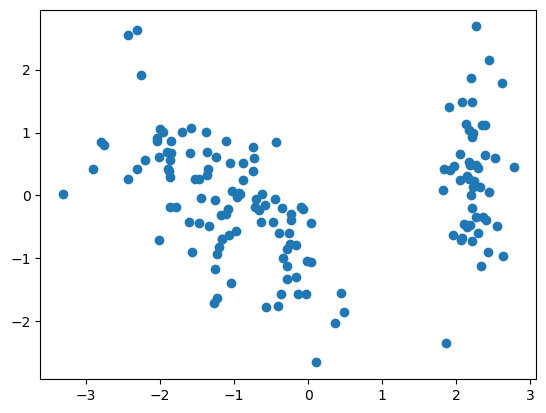

In [223]:
plt.scatter(projected_data[:, 0], projected_data[:, 1])



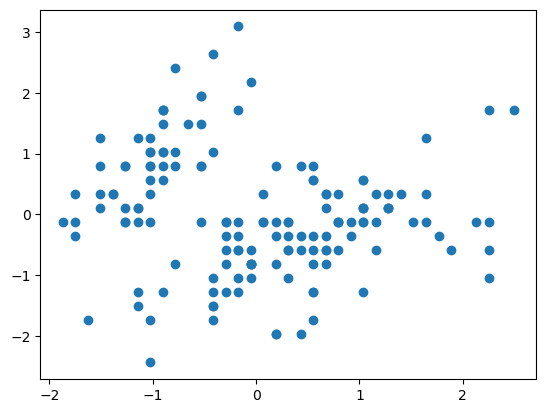

In [224]:
plt.scatter(X[:, 0], X[:, 1])

In [225]:
projected_data = PCA(X, 3)

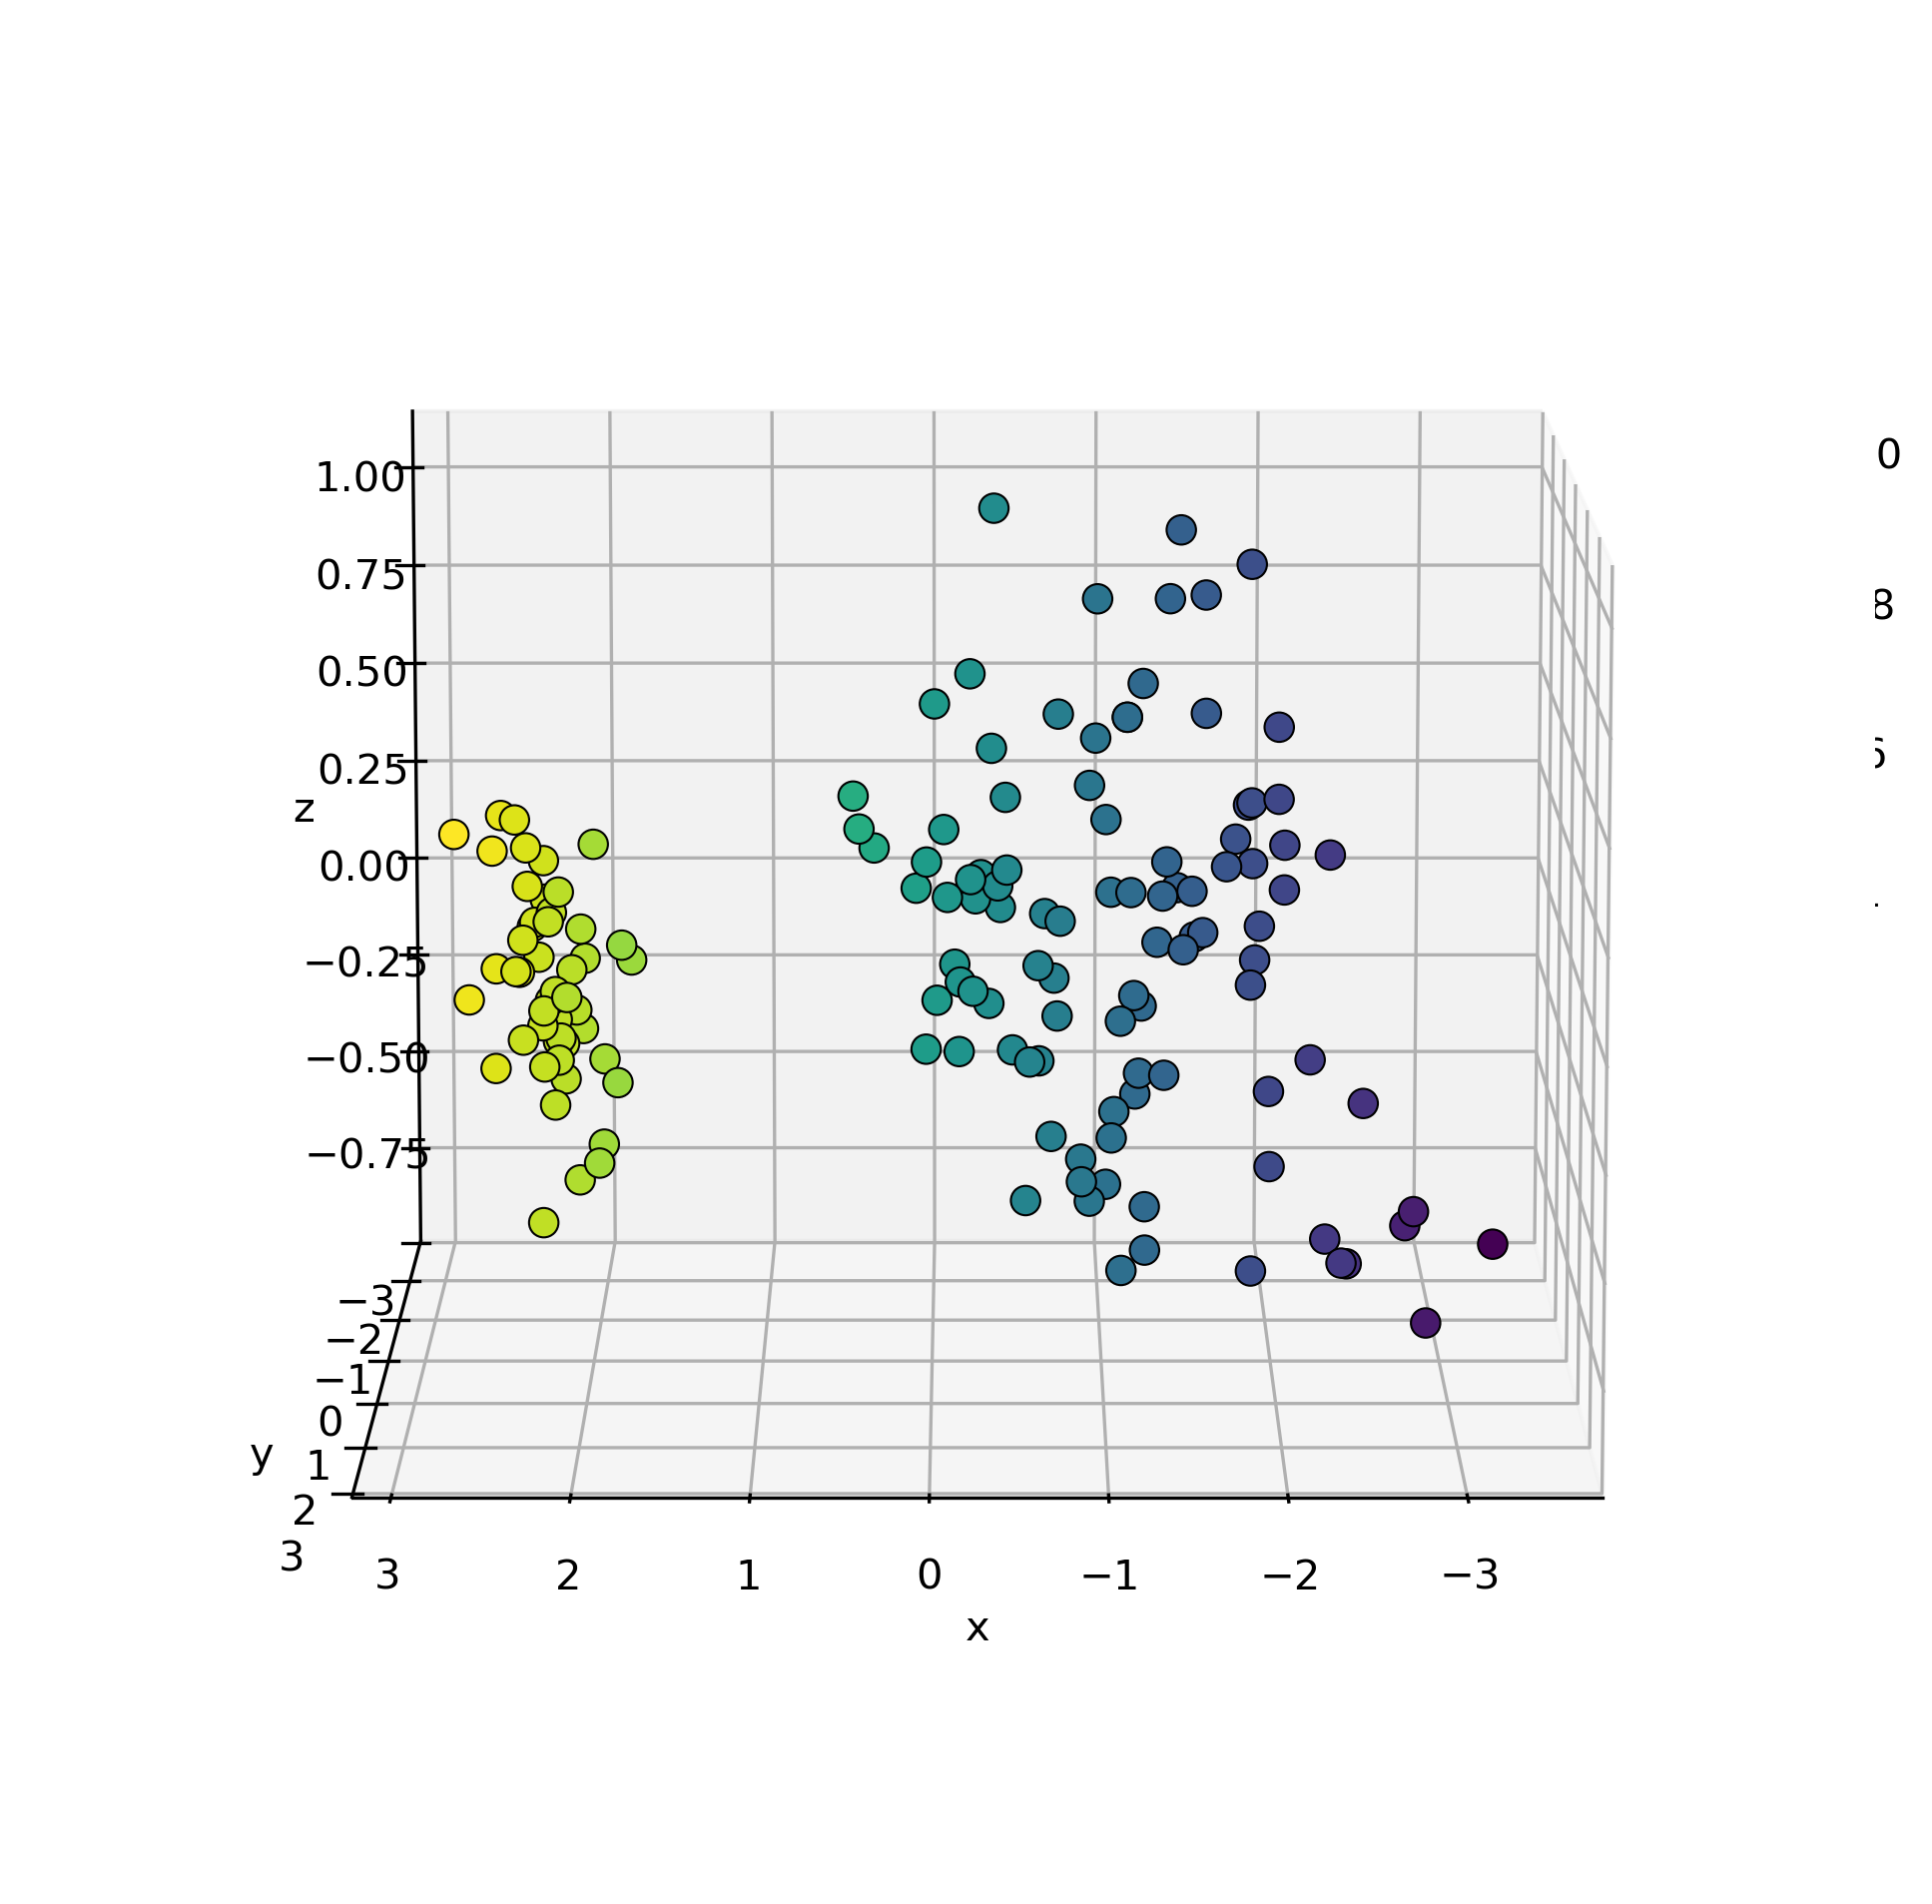

In [226]:


fig = plt.figure(figsize=(10, 8), dpi=300)
ax = fig.add_subplot(111, projection='3d')

x = projected_data[:, 0]
y = projected_data[:, 1]
z = projected_data[:, 2]


ax = plt.axes(projection='3d')
ax.scatter3D(x, y , z,c=x ,alpha=1, s=50, cmap='viridis', edgecolors='black', linewidth=0.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(elev=10, azim=90)
principal_axes_3d = np.eye(3)
plt.show()
